<a href="https://colab.research.google.com/github/alejomagri/SANDBOX/blob/main/Machine_Learning_course/Relaci%C3%B3n%20Minutos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD EAN**


GUIA 1 - ESPECIALIZACION EN MACHINE LEARNING

**“Proyecto 1 – Relación Minutos Ingreso”**


* Por: Sebastian Alejandro Magri Gordillo


Actividad 1


Teniendo en cuenta el problema planteado donde se busca ver la relacion que hay entre los ingresos de los clientes y los minutos gastados en el telefono se busca identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes,


<h4>5. Incluyan un exploratorio separado por cada una de las variables que se tienen en esta base se sugiere que use histogramas para las variables numéricas y diagramas de barras para las categóricas.

Se hace primero exploracion de los datos:

- Usamos pandas para usar los dataframes y analisis de datos
- Usamos matplotlib para las graficas, visualizacion de datos
- Usamos Seaborn contruida sobre matplot sirve tambien para mostrar las graficas de una mejor forma

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 - Se importa la tabla desde git-hub y se observan las primeras filas de datos para entender la estructura

In [30]:
csv_file = r'/content/SANDBOX/Credito_dias.csv'

df = pd.read_csv(csv_file, delimiter=';')
df['totmou'] = pd.to_numeric(df['totmou'], errors='coerce') #asigna a los valores no numericos un NaN y tener todos los valores como Float64
df

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


- ahora informacion sobre las columnas y tipos de datos

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       9956 non-null   float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


- se buscan los valores nulos

In [32]:
df.isnull().sum()

totmou          44
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64

- ahora se calculan estadisticas descriptivas basicas para ver la distribuicion de los datos

In [33]:
df.describe().round()

,totmou,totrev,eqpdays,Customer_ID
count,9956.0,10000.0,10000.0,10000.0
mean,7526.0,1042.0,387.0,1049965.0
std,8021.0,857.0,253.0,28794.0
min,0.0,11.0,-5.0,1000014.0
25%,2570.0,527.0,210.0,1025053.0
50%,5233.0,820.0,338.0,1049652.0
75%,9718.0,1273.0,522.0,1074798.0
max,136445.0,13427.0,1823.0,1099992.0


- Histogramas para distribuciones de variables numericas

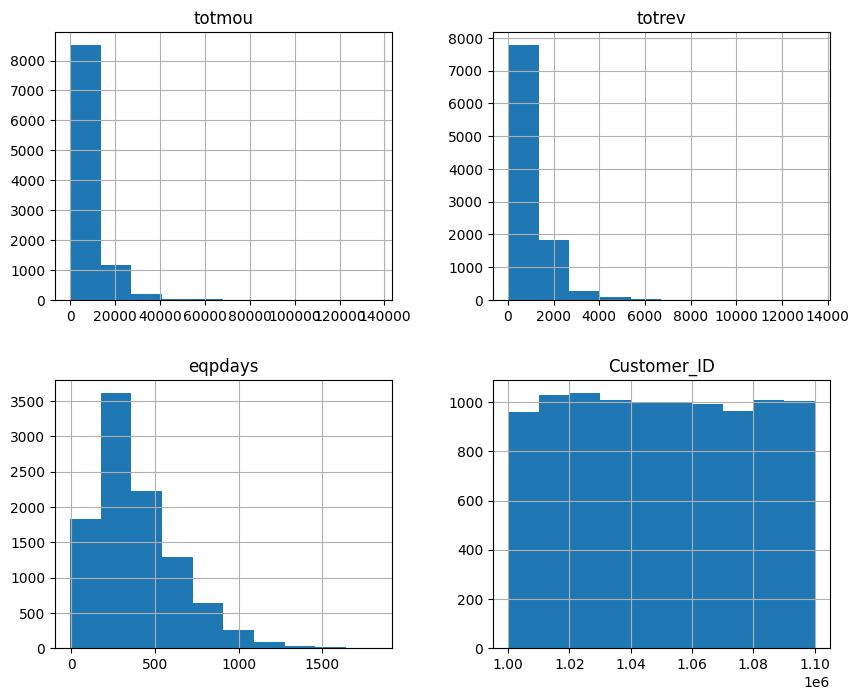

In [34]:
df.hist(figsize=(10,8))
plt.show()

- Graficas de barras para las variables categoricas

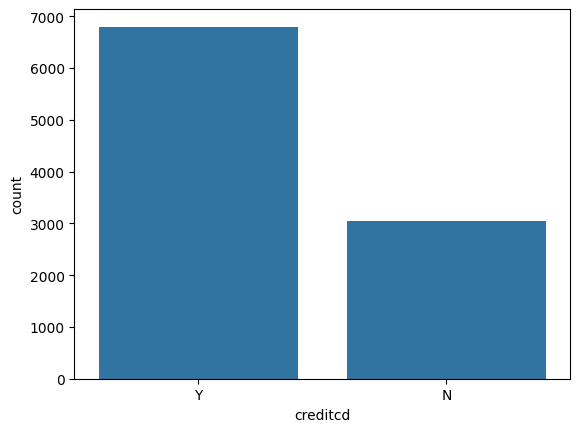

In [35]:
sns.countplot(x='creditcd', data=df)
plt.show()

Analisis de correlacion:
- calculamos la matriz de correlacion para entender las relaciones lineales entre las variables numericas

           totmou    totrev   eqpdays
totmou   1.000000  0.823662 -0.121045
totrev   0.823662  1.000000  0.061617
eqpdays -0.121045  0.061617  1.000000


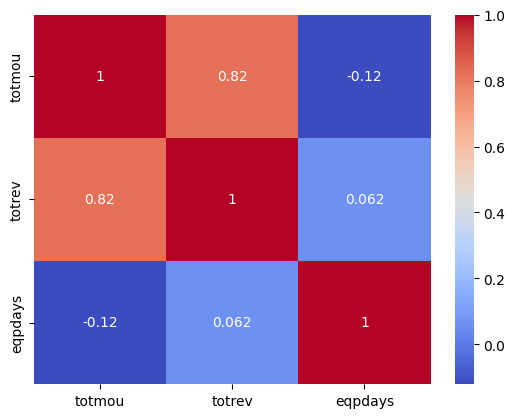

In [36]:
analisis = ['totmou', 'totrev', 'eqpdays']
corr_mat = df[analisis].corr()
print(corr_mat)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm') # se usa 'annot' para visualizar los valores de correlacion y 'cmap' para visualizar la coorelacion con colores
plt.show()

<h4> 6. Hagan un diagrama de dispersión entre las variables totrev y totmou. Posterior a la realización de este gráfico desarrolle una conclusión.


- para esta tarea es necesario utilizar la libreria "matplotlib" para crear diagramas de dispersión

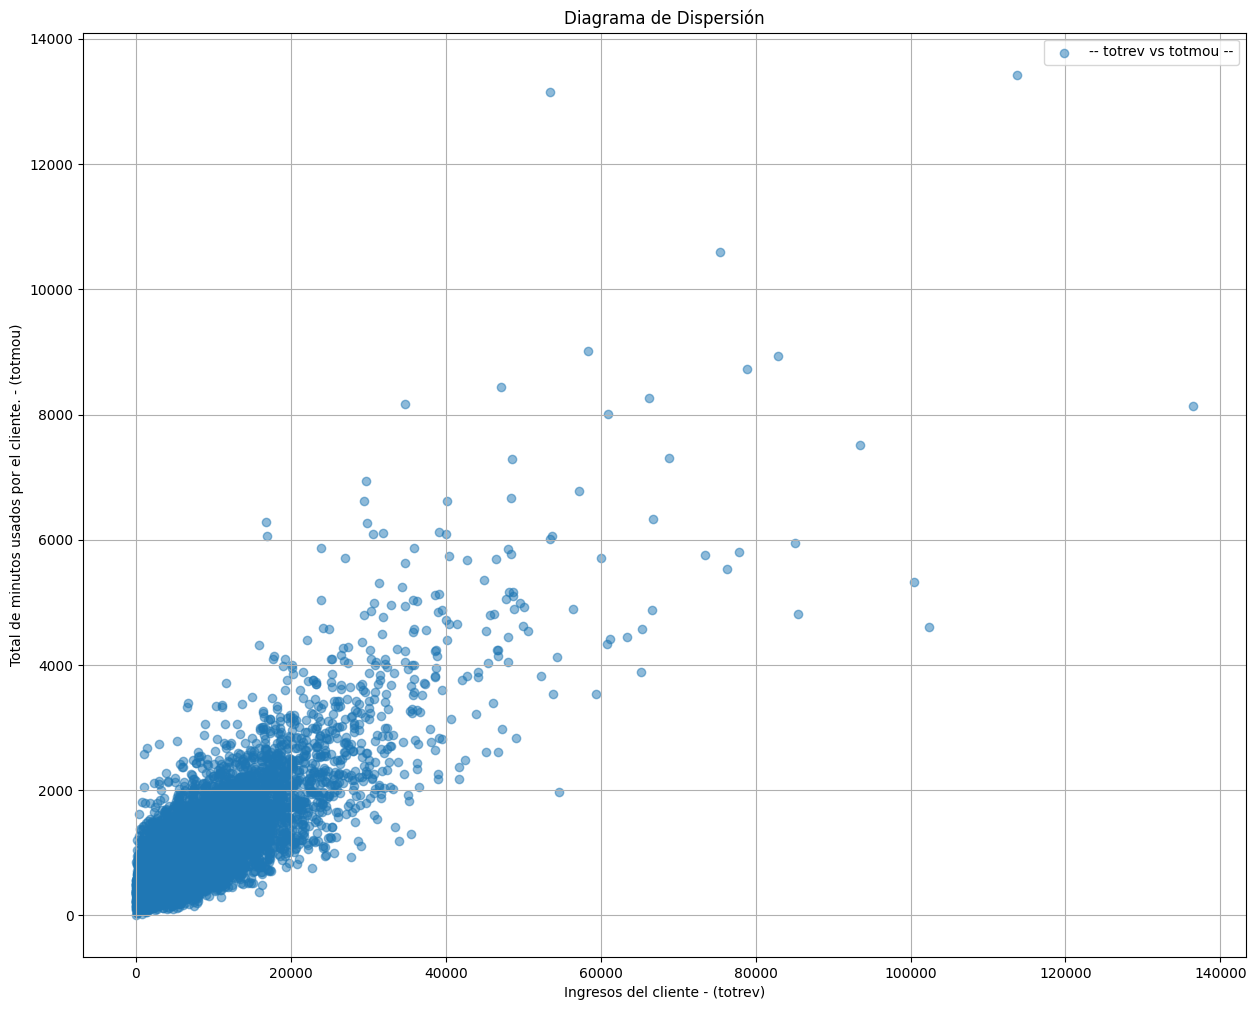

In [37]:
plt.figure(figsize=(15,12))
plt.scatter(df['totmou'], df['totrev'], label= '-- totrev vs totmou --', alpha=0.5)
plt.title('Diagrama de Dispersión')
plt.xlabel('Ingresos del cliente - (totrev)')
plt.ylabel('Total de minutos usados por el cliente. - (totmou)')
plt.legend()
plt.grid()

plt.show()

conclusion: Se puede observar que los datos tienden al acenso lo que quiere decir que es una correlacion positiva y que los valores son similares tambien que a mayor ingresos por cliente tambien es mayor la cantidad de minutos usados, tienden a formar una linea recta acendente.

<h4> 7. Respondan ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?


- Si, se puede decir que entre más aumenta el ingreso de la persona aumenta su consumo en minutos pero este aumento realmente no es tan gigante, ya que la mayoria con ingresos bajos tienden a concentrarse en un grupo que llama bastante.

<h4> 8. El hecho de tener crédito afecta alguna de estas dos variables, compruébenlo incluyendo en el diagrama de dispersión una leyenda que indique si tiene crédito o no.

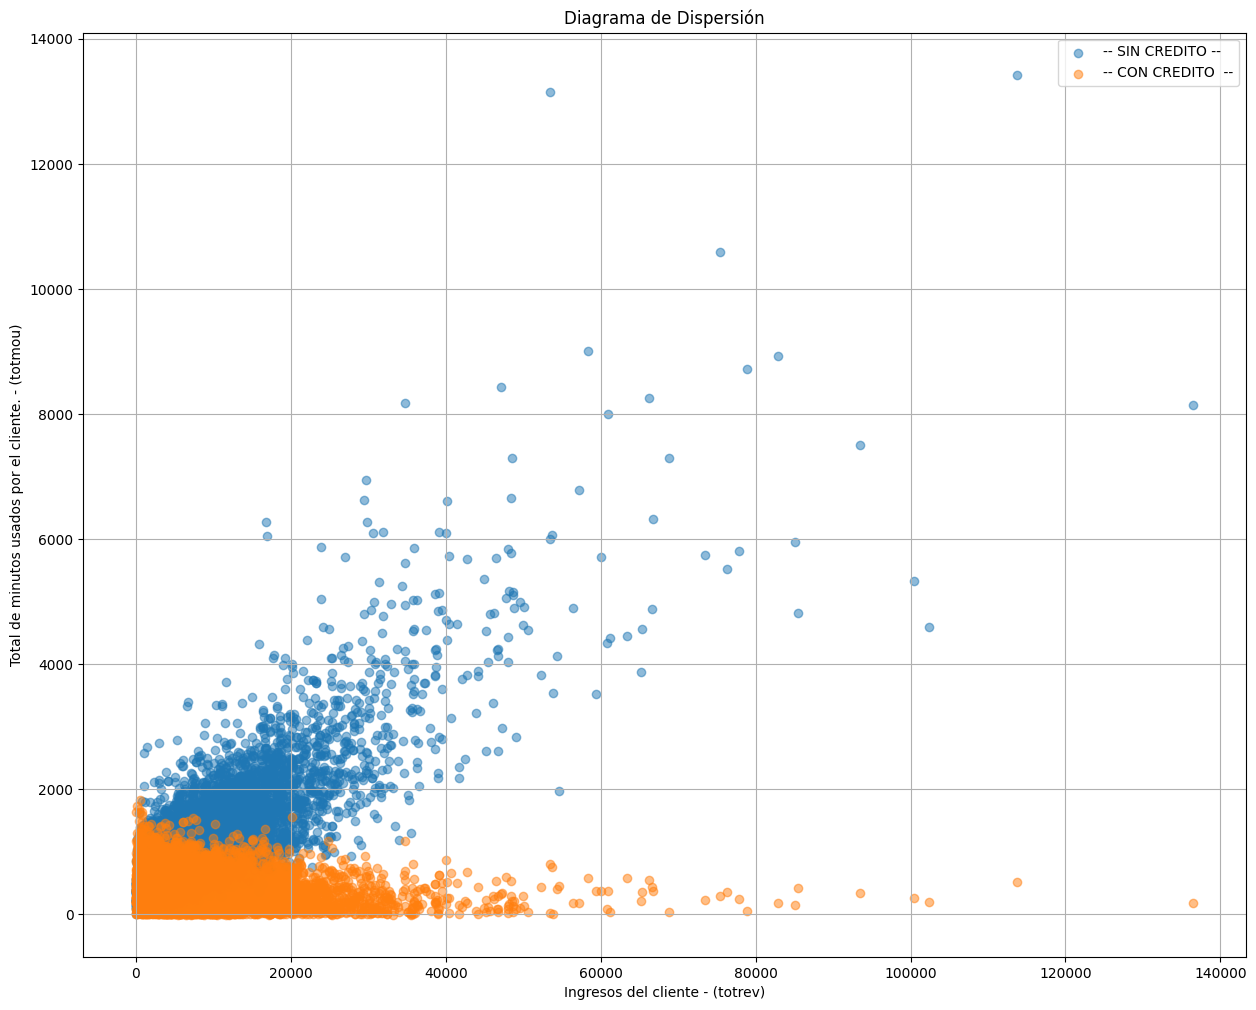

In [38]:
plt.figure(figsize=(15, 12))
plt.scatter(df['totmou'], df['totrev'], label='-- SIN CREDITO --', alpha=0.5)
plt.scatter(df['totmou'], df['eqpdays'], label='-- CON CREDITO  --', alpha=0.5)

plt.title('Diagrama de Dispersión')
plt.xlabel('Ingresos del cliente - (totrev)')
plt.ylabel('Total de minutos usados por el cliente. - (totmou)')
plt.legend()
plt.grid()

plt.show()


- Se puede concluir que aún que la persona tenga credito "alto ingreso" aun asi no utiliza muchos minutos.